[[-0.95013675]
 [-5.35689434]
 [-4.04535775]
 [-4.43291741]
 [-5.51063726]
 [-2.08926009]
 [-2.71474787]
 [-4.65080711]
 [-5.26152405]
 [-6.71741315]]
mean[-4.76134922 -2.84954477 -0.98456977]
covariance[4.96493495 6.04058556 5.01793585]


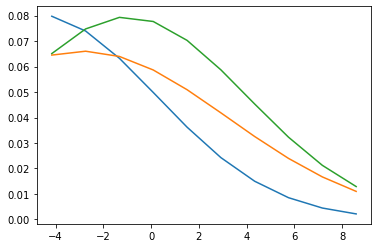

In [263]:
import numpy as np
from scipy import random
import matplotlib.transforms as transforms
from scipy.stats import multivariate_normal

# Generate synthetic data for density estimation
def gen_data(k=3, dim=1, points_per_cluster=5000, lim=[-10, 10]):
    '''
    Generates data from a random mixture of Gaussians in a given range.
    input:
        - k: Number of Gaussian clusters
        - dim: Dimension of generated points
        - points_per_cluster: Number of points to be generated for each cluster
        - lim: Range of mean values
    output:
        - X: Generated points (points_per_cluster*k, dim)
    '''
    x = []
    cove = []
    mean = random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
        cove.append(cov)
    x = np.clip(np.array(x),-10,10)
    return x, np.squeeze(mean), np.squeeze(cove)

#-------------------------
samp, mu, co  = gen_data()
print(samp[:10])# print some data from the sample
print('mean'+str(mu))
print('covariance'+str(co))
for t in range(3):
    plt.plot(bins, norm.pdf(bins, mu[t], co[t]))
plt.show() #Plot the sampled distributions

In [264]:
#Set parameters
M = 10 #no. of bins
b_len = abs(np.max(samp)-np.min(samp))/M # bin length
bins = np.arange(np.min(samp),np.max(samp), b_len) #bin levels
print(bins)

[-10.          -8.29563443  -6.59126885  -4.88690328  -3.18253771
  -1.47817213   0.22619344   1.93055901   3.63492459   5.33929016]


In [265]:
# Calculate binning counts
ar = np.zeros((10,1))
for j in samp:
    getind = (np.where(bins<=j)[0]) 
    #print(j)
    #print(getind)
    ind = getind[-1]
    #print(ind)
    ar[ind] += 1
    #print(ar)
print(ar)

[[ 369.]
 [1039.]
 [2276.]
 [3172.]
 [3428.]
 [2647.]
 [1458.]
 [ 476.]
 [ 121.]
 [  14.]]


(array([ 369, 1039, 2276, 3172, 3428, 2647, 1458,  476,  121]), array([-10.        ,  -8.29563443,  -6.59126885,  -4.88690328,
        -3.18253771,  -1.47817213,   0.22619344,   1.93055901,
         3.63492459,   5.33929016]))


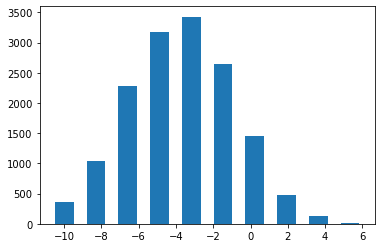

In [266]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
#print(np.histogram(samp, bins=bins, range=None, normed=None, weights=None, density=None))
# Creating histogram
plt.bar(bins.tolist(),np.squeeze(ar.tolist()), width = 1)
plt.show()